<a href="https://colab.research.google.com/github/NuttyLee22/Covid-19-Analise-das-Variantes-pelo-mundo/blob/main/Desafio_DataGirlsNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DAS VARIANTES DO COVID-19 PELO MUNDO** 

---

 **COM FOCO NA VARIANTE ÔMICRON**

  Pouco mais de uma semana após cientistas em Botsuana e na África do Sul alertarem sobre nova variante do SARS-CoV-2 em circulação, ainda temos mais perguntas do que respostas sobre ela. No dia seguinte ao alerta, a Organização Mundial da Saúde (OMS) classificou a B.1.1.529 como uma variante de preocupação (VOC), que passou a ser denominada **Ômicron**.

  Uma das preocupações em relação à linhagem é o grande número de mutações, que podem conferir vantagens ao vírus, como uma maior transmissibilidade e o escape do sistema imunológico. Ou seja, podem afetar as propriedades do vírus, com uma ou mais implicações, incluindo o aumento da capacidade de transmissão ou da gravidade da doença, além de impactos para a eficácia das vacinas, medicamentos e métodos de diagnóstico.

  O seguinte notebook tem como objetivo investigar a taxa de transmissão das variantes do Corona Vírus, principalmente da linhagem B.1.1.529 - Ômicron.

## **Preparando o ambiente**

In [ ]:
import sys
!{sys.executable} -m pip install bar_chart_race


In [ ]:
#Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import datetime as datetime
from plotly.subplots import make_subplots
import bar_chart_race as bcr
from IPython.display import HTML
from tqdm import tqdm

In [ ]:
#Acesso ao dataset

link = "https://raw.githubusercontent.com/NuttyLee22/Covid-19-Analise-das-Variantes-pelo-mundo/main/covid-variants.csv"

df = pd.read_csv(link)


## **Visualizando os dados brutos**

In [ ]:
# Dataframe
df[:40]

location        date         variant  num_sequences  perc_sequences  \
0    Angola  2020-07-06           Alpha              0             0.0   
1    Angola  2020-07-06       B.1.1.277              0             0.0   
2    Angola  2020-07-06       B.1.1.302              0             0.0   
3    Angola  2020-07-06       B.1.1.519              0             0.0   
4    Angola  2020-07-06         B.1.160              0             0.0   
5    Angola  2020-07-06         B.1.177              0             0.0   
6    Angola  2020-07-06         B.1.221              0             0.0   
7    Angola  2020-07-06         B.1.258              0             0.0   
8    Angola  2020-07-06         B.1.367              0             0.0   
9    Angola  2020-07-06         B.1.620              0             0.0   
10   Angola  2020-07-06            Beta              0             0.0   
11   Angola  2020-07-06           Delta              0             0.0   
12   Angola  2020-07-06         Epsilon              0             0.0   
13   Angola  2020-07-06             Eta              0             0.0   
14   Angola  2020-07-06           Gamma              0             0.0   
15   Angola  2020-07-06            Iota              0             0.0   
16   Angola  2020-07-06           Kappa              0             0.0   
17   Angola  2020-07-06          Lambda              0             0.0   
18   Angola  2020-07-06              Mu              0             0.0   
19   Angola  2020-07-06         Omicron              0             0.0   
20   Angola  2020-07-06   S:677H.Robin1              0             0.0   
21   Angola  2020-07-06  S:677P.Pelican              0             0.0   
22   Angola  2020-07-06          others              3           100.0   
23   Angola  2020-07-06         non_who              3           100.0   
24   Angola  2020-08-31           Alpha              0             0.0   
25   Angola  2020-08-31       B.1.1.277              0             0.0   
26   Angola  2020-08-31       B.1.1.302              0             0.0   
27   Angola  2020-08-31       B.1.1.519              0             0.0   
28   Angola  2020-08-31         B.1.160              0             0.0   
29   Angola  2020-08-31         B.1.177              0             0.0   
30   Angola  2020-08-31         B.1.221              0             0.0   
31   Angola  2020-08-31         B.1.258              0             0.0   
32   Angola  2020-08-31         B.1.367              0             0.0   
33   Angola  2020-08-31         B.1.620              0             0.0   
34   Angola  2020-08-31            Beta              1           100.0   
35   Angola  2020-08-31           Delta              0             0.0   
36   Angola  2020-08-31         Epsilon              0             0.0   
37   Angola  2020-08-31             Eta              0             0.0   
38   Angola  2020-08-31           Gamma              0             0.0   
39   Angola  2020-08-31            Iota              0             0.0   

    num_sequences_total  
0                     3  
1                     3  
2                     3  
3                     3  
4                     3  
5                     3  
6                     3  
7                     3  
8                     3  
9                     3  
10                    3  
11                    3  
12                    3  
13                    3  
14                    3  
15                    3  
16                    3  
17                    3  
18                    3  
19                    3  
20                    3  
21                    3  
22                    3  
23                    3  
24                    1  
25                    1  
26                    1  
27                    1  
28                    1  
29                    1  
30                    1  
31                    1  
32                    1  
33                    1  
34                    1  
35                    1  
36    

In [ ]:
#Primeiras linhas do dataframe
df.head()

location        date    variant  num_sequences  perc_sequences  \
0   Angola  2020-07-06      Alpha              0             0.0   
1   Angola  2020-07-06  B.1.1.277              0             0.0   
2   Angola  2020-07-06  B.1.1.302              0             0.0   
3   Angola  2020-07-06  B.1.1.519              0             0.0   
4   Angola  2020-07-06    B.1.160              0             0.0   

   num_sequences_total  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3

In [ ]:
#Ultimas linhas do dataframe
df.tail()

location        date         variant  num_sequences  perc_sequences  \
92683  Zimbabwe  2021-11-01         Omicron              0             0.0   
92684  Zimbabwe  2021-11-01   S:677H.Robin1              0             0.0   
92685  Zimbabwe  2021-11-01  S:677P.Pelican              0             0.0   
92686  Zimbabwe  2021-11-01          others              0             0.0   
92687  Zimbabwe  2021-11-01         non_who              0             0.0   

       num_sequences_total  
92683                    6  
92684                    6  
92685                    6  
92686                    6  
92687                    6

In [ ]:
#Colunas
df.columns

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')

In [ ]:
#Tamanho
df.shape

(92688, 6)

In [ ]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92688 entries, 0 to 92687
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             92688 non-null  object 
 1   date                 92688 non-null  object 
 2   variant              92688 non-null  object 
 3   num_sequences        92688 non-null  int64  
 4   perc_sequences       92688 non-null  float64
 5   num_sequences_total  92688 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.2+ MB


In [ ]:
#Dados estatísticos das colunas de tipo numerico
df.describe()

num_sequences  perc_sequences  num_sequences_total
count   92688.000000    92688.000000         92688.000000
mean       68.680832        6.273635          1412.803988
std      1540.826315       22.062427          7750.653788
min         0.000000       -0.010000             1.000000
25%         0.000000        0.000000            12.000000
50%         0.000000        0.000000            58.000000
75%         0.000000        0.000000           384.000000
max    141585.000000      100.000000        145458.000000

In [ ]:
#Quantidade de vezes que cada país aparece no df
df['location'].value_counts()

Denmark                      1032
Germany                      1032
France                       1032
South Korea                  1032
Switzerland                  1032
Mexico                       1032
United Kingdom               1032
Australia                    1032
Sweden                       1032
Belgium                      1032
Italy                        1032
United States                1032
India                        1032
Spain                        1032
Hong Kong                    1008
Ecuador                      1008
Austria                      1008
Netherlands                  1008
Russia                       1008
Singapore                    1008
Indonesia                    1008
Czechia                      1008
Ireland                      1008
Chile                        1008
South Africa                 1008
Argentina                    1008
Norway                       1008
Brazil                       1008
Japan                        1008
Kenya         

## **Análise geral das variantes**

In [ ]:
#Separando as colunas que serão usadas na análise
df_var=df[['location','variant','perc_sequences','date']].copy()
df_var[:20]

location    variant  perc_sequences        date
0    Angola      Alpha             0.0  2020-07-06
1    Angola  B.1.1.277             0.0  2020-07-06
2    Angola  B.1.1.302             0.0  2020-07-06
3    Angola  B.1.1.519             0.0  2020-07-06
4    Angola    B.1.160             0.0  2020-07-06
5    Angola    B.1.177             0.0  2020-07-06
6    Angola    B.1.221             0.0  2020-07-06
7    Angola    B.1.258             0.0  2020-07-06
8    Angola    B.1.367             0.0  2020-07-06
9    Angola    B.1.620             0.0  2020-07-06
10   Angola       Beta             0.0  2020-07-06
11   Angola      Delta             0.0  2020-07-06
12   Angola    Epsilon             0.0  2020-07-06
13   Angola        Eta             0.0  2020-07-06
14   Angola      Gamma             0.0  2020-07-06
15   Angola       Iota             0.0  2020-07-06
16   Angola      Kappa             0.0  2020-07-06
17   Angola     Lambda             0.0  2020-07-06
18   Angola         Mu             0.0  2020-07-06
19   Angola    Omicron             0.0  2020-07-06

In [ ]:
#Variantes e países presentes no df

print('Variantes: \n', df_var.variant.unique())
print('\n Quant. Variantes: \n', len(df_var.variant.unique()))

print('\n\nRegiões: \n', df_var.location.unique())
print('\n Quant. Regiões: \n', len(df_var.location.unique()))

Variantes: 
 ['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']

 Quant. Variantes: 
 24


Regiões: 
 ['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta' 'Mexi

In [ ]:
#Formatando da data

df_var['date']=df_var['date'].apply(pd.to_datetime, dayfirst=True)
df_var=df_var.fillna(0)

In [ ]:
df_var['date']

0       2020-07-06
1       2020-07-06
2       2020-07-06
3       2020-07-06
4       2020-07-06
5       2020-07-06
6       2020-07-06
7       2020-07-06
8       2020-07-06
9       2020-07-06
10      2020-07-06
11      2020-07-06
12      2020-07-06
13      2020-07-06
14      2020-07-06
15      2020-07-06
16      2020-07-06
17      2020-07-06
18      2020-07-06
19      2020-07-06
20      2020-07-06
21      2020-07-06
22      2020-07-06
23      2020-07-06
24      2020-08-31
25      2020-08-31
26      2020-08-31
27      2020-08-31
28      2020-08-31
29      2020-08-31
30      2020-08-31
31      2020-08-31
32      2020-08-31
33      2020-08-31
34      2020-08-31
35      2020-08-31
36      2020-08-31
37      2020-08-31
38      2020-08-31
39      2020-08-31
40      2020-08-31
41      2020-08-31
42      2020-08-31
43      2020-08-31
44      2020-08-31
45      2020-08-31
46      2020-08-31
47      2020-08-31
48      2020-09-28
49      2020-09-28
50      2020-09-28
51      2020-09-28
52      2020

## **Analisando a variante Ômicron**


In [ ]:
#Variavel propria pros dados da variante Omicron
Omicron=df[df['variant']=='Omicron']

In [ ]:
#Agrupando por regiao
Omicron2 = Omicron.groupby(['location'])

In [ ]:
#Agregando por data
df_Omicron = Omicron2.agg(Minimum_Date=('date', np.min))

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
#Primeiros registros do corona vírus agrupado no mesmo dia
df_Omicron.sort_values(by="Minimum_Date").head(40)

Minimum_Date
location                         
Latvia                 2020-05-11
Paraguay               2020-05-11
Pakistan               2020-05-11
Oman                   2020-05-11
Norway                 2020-05-11
Nigeria                2020-05-11
New Zealand            2020-05-11
Netherlands            2020-05-11
Morocco                2020-05-11
Mexico                 2020-05-11
Maldives               2020-05-11
Malaysia               2020-05-11
Madagascar             2020-05-11
Luxembourg             2020-05-11
Zambia                 2020-05-11
Kosovo                 2020-05-11
Kenya                  2020-05-11
Kazakhstan             2020-05-11
Japan                  2020-05-11
Italy                  2020-05-11
Peru                   2020-05-11
Poland                 2020-05-11
Portugal               2020-05-11
Qatar                  2020-05-11
Uruguay                2020-05-11
United States          2020-05-11
United Kingdom         2020-05-11
United Arab Emirates   2020-05-11
Ukraine                2020-05-11
Uganda                 2020-05-11
Turkey                 2020-05-11
Switzerland            2020-05-11
Sweden                 2020-05-11
Israel                 2020-05-11
Suriname               2020-05-11
Spain                  2020-05-11
South Korea            2020-05-11
South Africa           2020-05-11
Slovenia               2020-05-11
Slovakia               2020-05-11

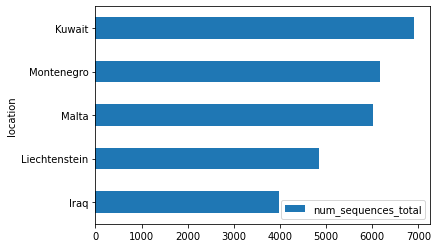

In [ ]:
#Tabela com o numero de sequencia do corna vírus por país - 5 primeiros
pd.pivot_table(df,values='num_sequences_total',index=['location'],
               aggfunc=np.sum).sort_values('num_sequences_total').head().plot(kind='barh')

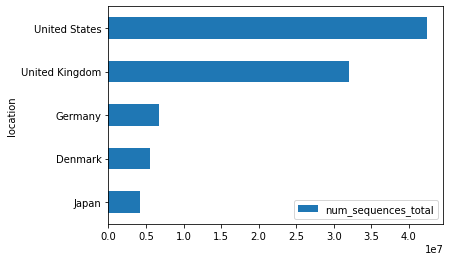

In [ ]:
#Tabela com o numero de sequencia do corna vírus por país - 5 ultimos
pd.pivot_table(df,values='num_sequences_total',index=['location'],
               aggfunc=np.sum).sort_values('num_sequences_total').tail().plot(kind='barh')

In [ ]:
#Tabela com a porcetagem de sequencia do omicron em cada país agrupado por data
df_var2=df_var[df_var['date']==df_var['date'].max()][df_var['variant']=='Omicron'].sort_values('perc_sequences',ascending=False)
df_var2[0:15]


location  variant  perc_sequences       date
25987         Finland  Omicron          100.00 2021-12-08
78523     South Korea  Omicron          100.00 2021-12-08
3259        Australia  Omicron           37.50 2021-12-08
90283   United States  Omicron            9.25 2021-12-08
79555           Spain  Omicron            9.09 2021-12-08
82123          Sweden  Omicron            9.09 2021-12-08
27019          France  Omicron            6.67 2021-12-08
6955          Belgium  Omicron            6.34 2021-12-08
35563           India  Omicron            4.17 2021-12-08
29587         Germany  Omicron            2.07 2021-12-08
53251          Mexico  Omicron            1.75 2021-12-08
20467         Denmark  Omicron            1.72 2021-12-08
89251  United Kingdom  Omicron            0.68 2021-12-08
40747           Italy  Omicron            0.00 2021-12-08
71659         Senegal  Omicron            0.00 2021-12-08

In [ ]:
#Gráfico de barras com a porcentagem de sequencias Omicron por país - 30 primeiros
fig = px.bar(df_var2[0:30], x='location', y='perc_sequences',title="Porcentagem de sequencias da variante Omicron")
fig.show()

In [ ]:
#Tabela com a porcetagem de sequencia do omicron em cada país agrupado por data - depois do dia 14/11/2021
df_var3=df_var[df_var['variant']=='Omicron'][df_var['date']>'2021-11-14'].sort_values('perc_sequences',ascending=False)
df_var3[0:20]

location  variant  perc_sequences       date
78523    South Korea  Omicron          100.00 2021-12-08
25987        Finland  Omicron          100.00 2021-12-08
78499    South Korea  Omicron          100.00 2021-11-29
77491   South Africa  Omicron           84.15 2021-11-29
30571          Ghana  Omicron           71.74 2021-11-29
33403      Hong Kong  Omicron           50.00 2021-11-29
3259       Australia  Omicron           37.50 2021-12-08
77467   South Africa  Omicron           31.82 2021-11-15
9427        Botswana  Omicron           22.50 2021-11-29
33379      Hong Kong  Omicron           11.11 2021-11-15
90283  United States  Omicron            9.25 2021-12-08
79555          Spain  Omicron            9.09 2021-12-08
82123         Sweden  Omicron            9.09 2021-12-08
58387        Nigeria  Omicron            9.09 2021-11-29
27019         France  Omicron            6.67 2021-12-08
6955         Belgium  Omicron            6.34 2021-12-08
4267         Austria  Omicron            5.88 2021-11-29
9403        Botswana  Omicron            4.39 2021-11-15
35563          India  Omicron            4.17 2021-12-08
42043          Japan  Omicron            4.00 2021-11-29

In [ ]:
#Ocorrência da variante Omicron em cada um dos 3 seguitnes países
print('\n----- Ocorrência do Omicron -----\n')

print('Africa do Sul:\n',df_var3['date'][df_var3['location']=='South Africa'])
print('\nHong Kong:\n',df_var3['date'][df_var3['location']=='Hong Kong'])
print('\nCoreia do Sul:\n',df_var3['date'][df_var3['location']=='South Korea'])


----- Ocorrência do Omicron -----

Africa do Sul:
 77491   2021-11-29
77467   2021-11-15
Name: date, dtype: datetime64[ns]

Hong Kong:
 33403   2021-11-29
33379   2021-11-15
Name: date, dtype: datetime64[ns]

Coreia do Sul:
 78523   2021-12-08
78499   2021-11-29
78475   2021-11-15
Name: date, dtype: datetime64[ns]


In [ ]:
#Configurações para gráfico de linha
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=df_var3['date'][df_var3['location']=='South Africa'],y=df_var3[df_var3['location']=='South Africa']['perc_sequences'],name='South Africa'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df_var3['date'][df_var3['location']=='South Korea'],y=df_var3[df_var3['location']=='South Korea']['perc_sequences'],name='South Korea'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df_var3['date'][df_var3['location']=='Spain'],y=df_var3[df_var3['location']=='Spain']['perc_sequences'],name='Spain'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df_var3['date'][df_var3['location']=='Hong Kong'],y=df_var3[df_var3['location']=='Hong Kong']['perc_sequences'],name='Hong Kong'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df_var3['date'][df_var3['location']=='Australia'],y=df_var3[df_var3['location']=='Australia']['perc_sequences'],name='Australia'),secondary_y=False,)

fig.update_layout(autosize=False,width=700,height=500,title_text="Porcentagem de sequencia Omicron por país")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="perc_sequences",secondary_y=False)

fig.show()

In [ ]:
#Preparando variaveis dos países selecionados
df_var2eu=df_var[df_var.location=='United States']
df_var2br=df_var[df_var.location=='Brazil']
df_var2af=df_var[df_var.location=='South Africa']
df_var2cs=df_var[df_var.location=='South Korea']
df_var2it=df_var[df_var.location=='Italy']

In [ ]:
df_var3eu=df_var2eu.set_index(['date','variant']).unstack()['perc_sequences']
df_var3br=df_var2br.set_index(['date','variant']).unstack()['perc_sequences']
df_var3af=df_var2af.set_index(['date','variant']).unstack()['perc_sequences']
df_var3cs=df_var2cs.set_index(['date','variant']).unstack()['perc_sequences']
df_var3it=df_var2it.set_index(['date','variant']).unstack()['perc_sequences']

In [ ]:
#Criando listas com os países e suas respectivas variaveis 
paises=['EUA','Brasil','Africa do Sul','Coreia do Sul', 'Italia']
dataset=[df_var3eu,df_var3br,df_var3af,df_var3cs,df_var3it]

**Criando gráficos dinâmicos**

In [ ]:
#Função para a acriação dos gráficos dinâmicos dos países escolhidos 
def make_bcr(df,name):
    bcr.bar_chart_race(
        df=df,
        filename='CovidVariantes_'+name+'.mp4',
        orientation='h',
        sort='desc',
        n_bars=6, #5
        fixed_order=False,
        fixed_max=False,
        steps_per_period=10,
        interpolate_period=False,
        label_bars=True,
        bar_size=.95,
        period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
        period_fmt='%B %d, %Y',
        period_summary_func=lambda v, r: {'x': .99, 'y': .18,'s': '',
                                          'ha': 'right', 'size': 8, 'family': 'Courier New'},
        perpendicular_bar_func='median',
        period_length=1000,
        figsize=(5,3),
        dpi=500,
        cmap='dark24',
        title='Variante do Covid-19 em '+name,
        title_size=10,
        bar_label_size=7,
        tick_label_size=5,
        shared_fontdict={'color' : '.1'},
        scale='linear',
        writer=None,
        fig=None,
        bar_kwargs={'alpha': .7},
        filter_column_colors=True)

In [ ]:
#Laço de repetição que chama a função make_bcr para criar os gráficos de cada país
for i in tqdm(range(5)):
    make_bcr(dataset[i],paises[i])

100%|██████████| 5/5 [06:06<00:00, 73.37s/it]


**Gráficos dinâmicos em formato mp4**

In [ ]:
#Estados Unidos
bcr.bar_chart_race(df=df_var3eu, filename=None)

In [ ]:
#Brasil
bcr.bar_chart_race(df=df_var3br, filename=None)

In [ ]:
#África do Sul
bcr.bar_chart_race(df=df_var3af, filename=None)

In [ ]:
#Coréia do Sul
bcr.bar_chart_race(df=df_var3cs, filename=None)

In [ ]:
#Itália
bcr.bar_chart_race(df=df_var3it, filename=None)